In [2]:
!pip install xgboost

  Using cached xgboost-1.3.3-py3-none-win_amd64.whl (95.2 MB)


In [6]:
import xgboost as xgb
import pandas as pd
import numpy as np
import math


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import time


ModuleNotFoundError: No module named 'seaborn'

In [142]:
%%time
URL = 'https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/boosting/heart.csv'
df = pd.read_csv(URL)

Wall time: 544 ms


In [3]:
#df

In [4]:
#df.info()

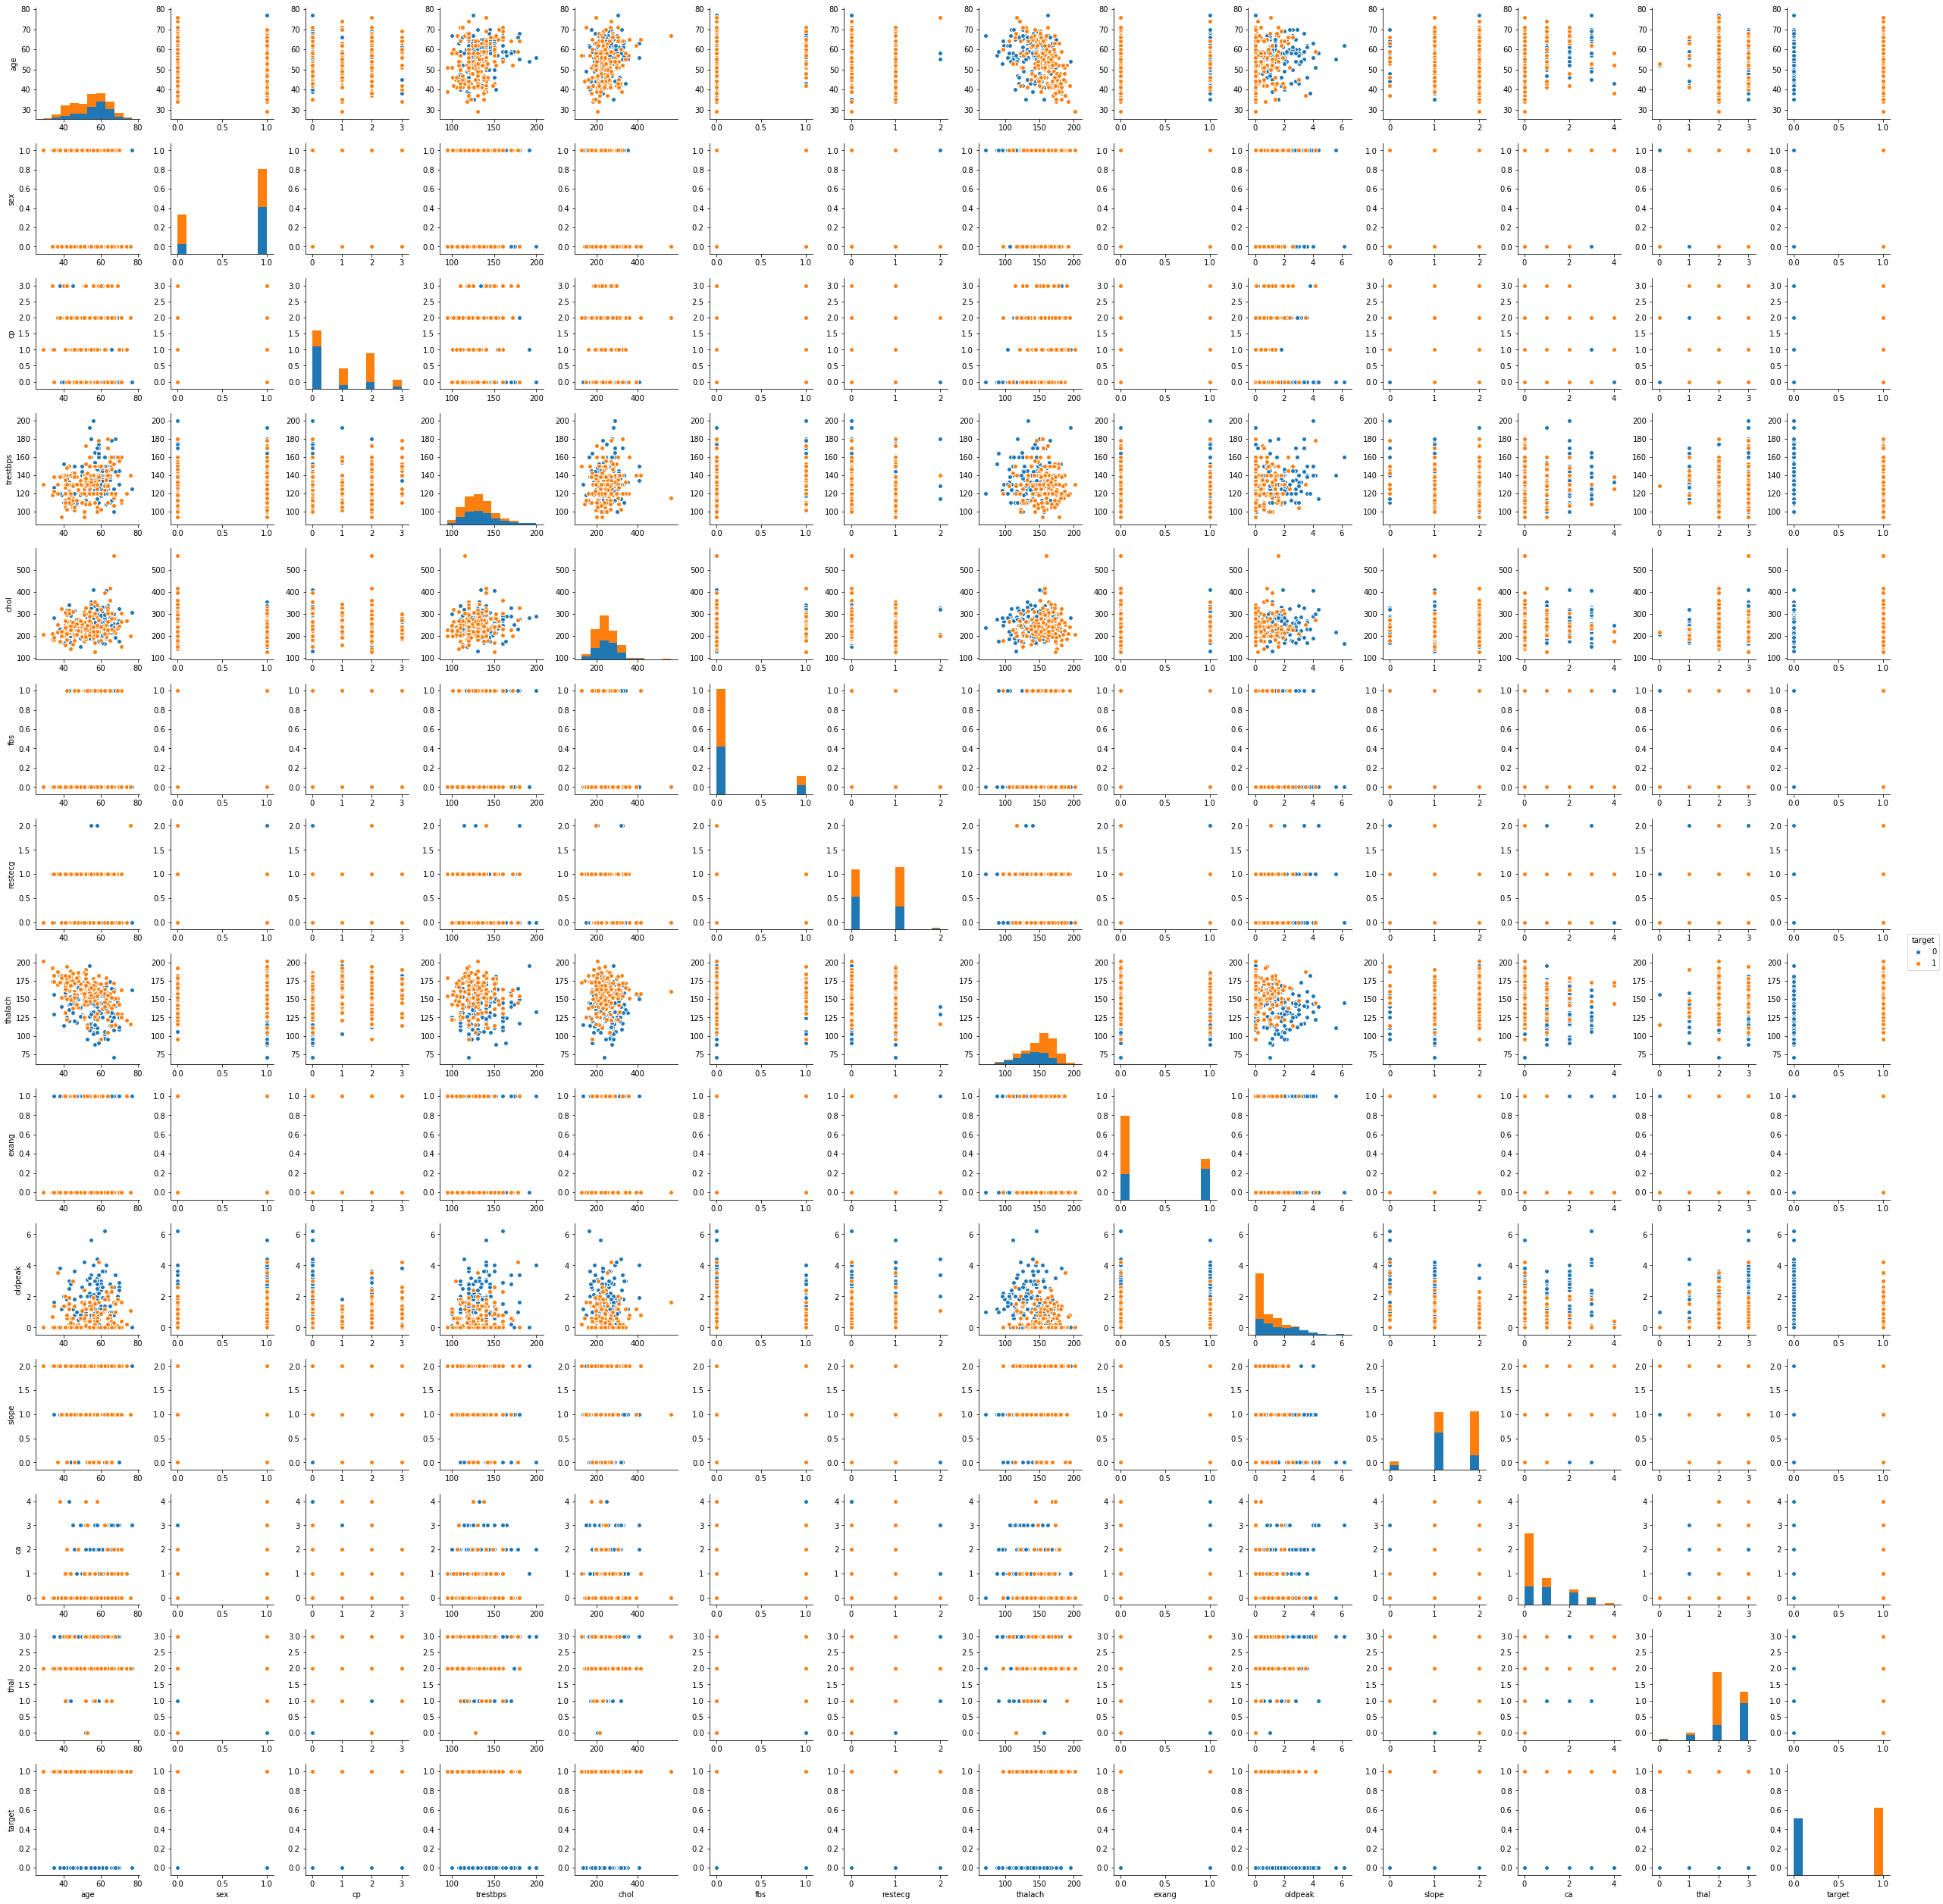

In [5]:
sns_plot = sns.pairplot(df, hue="target" )
plt.show()

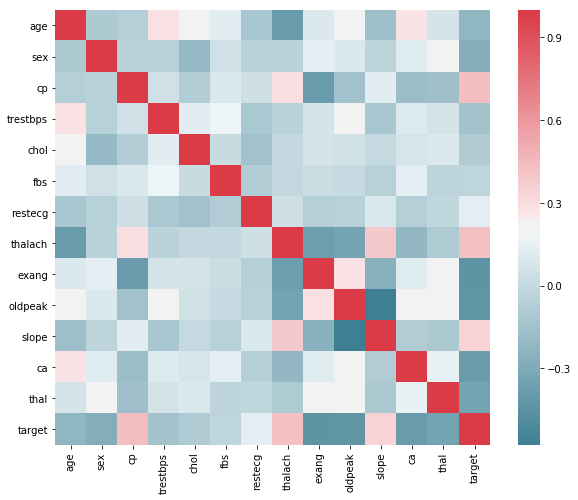

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns_corr = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [82]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.age = pd.qcut(df.age, 8, labels=False)
df.trestbps = pd.qcut(df.trestbps, 5, labels=False, duplicates = 'drop')
df.chol = pd.qcut(df.chol, 5, labels=False, duplicates = 'drop')
df.thalach = pd.qcut(df.thalach, 4, labels=False, duplicates = 'drop')
df.oldpeak = pd.qcut(df.oldpeak, 4, labels=False, duplicates = 'drop')


category: age
4    47
0    45
2    44
6    38
7    33
5    33
3    32
1    31
Name: age, dtype: int64


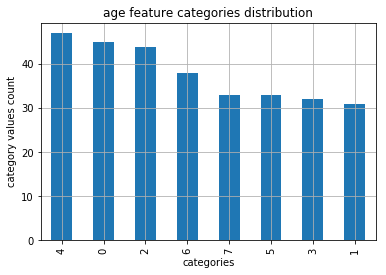

category: sex
1    207
0     96
Name: sex, dtype: int64


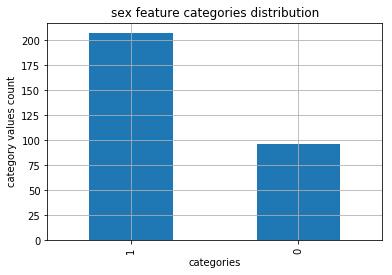

category: cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


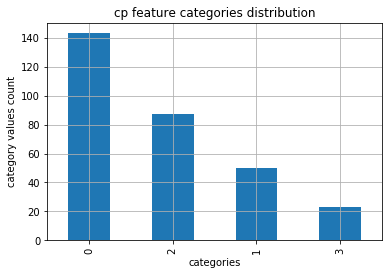

category: trestbps
0    97
2    62
4    60
3    59
1    25
Name: trestbps, dtype: int64


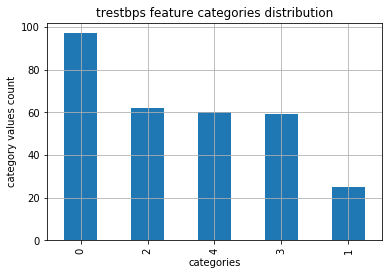

category: chol
0    63
2    62
4    61
1    60
3    57
Name: chol, dtype: int64


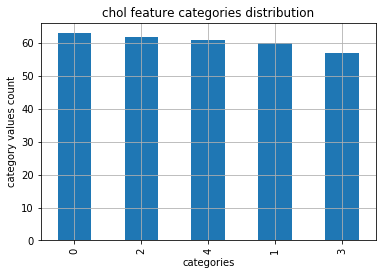

category: fbs
0    258
1     45
Name: fbs, dtype: int64


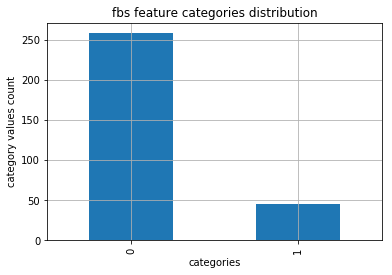

category: restecg
1    152
0    147
2      4
Name: restecg, dtype: int64


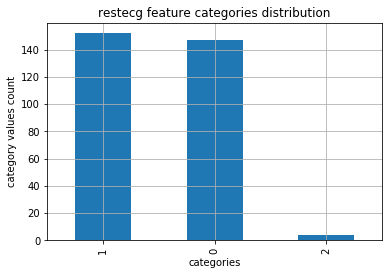

category: thalach
1    78
0    76
3    75
2    74
Name: thalach, dtype: int64


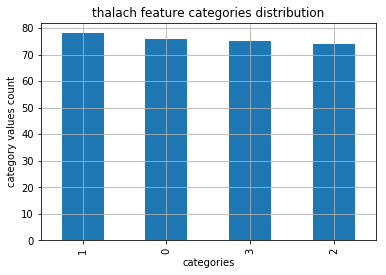

category: exang
0    204
1     99
Name: exang, dtype: int64


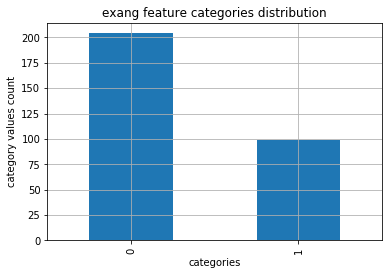

category: oldpeak
0    163
2     74
1     66
Name: oldpeak, dtype: int64


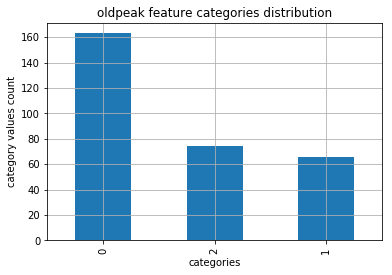

category: slope
2    142
1    140
0     21
Name: slope, dtype: int64


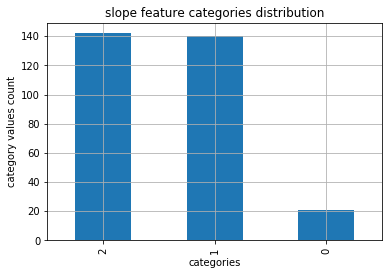

category: ca
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


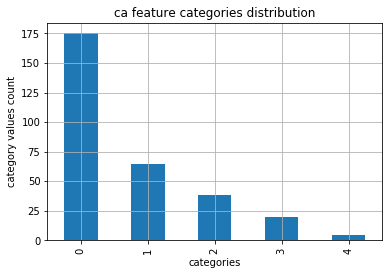

category: thal
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


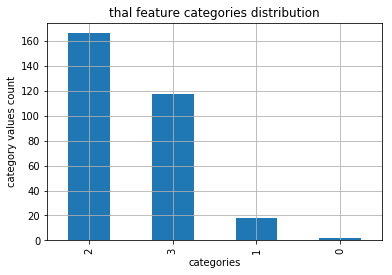

category: target
1    165
0    138
Name: target, dtype: int64


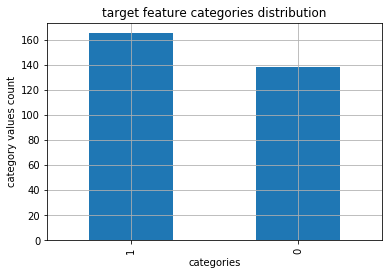

In [8]:
for category in df.columns:
    print(f"category: {category}")
    print(df[category].value_counts())

    df[category].value_counts().plot(kind="bar")
    plt.title(f"{category} feature categories distribution")
    plt.ylabel("category values count")
    plt.xlabel("categories")
    plt.grid()
    plt.show()

In [9]:
X = df.iloc[:, df.columns != 'target']
y = df.target

In [10]:
X.shape,y.shape

((303, 13), (303,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [158]:
start_time = time.time()

Decision_Tree = DecisionTreeClassifier(max_depth=6)

Decision_Tree.fit(X_train, y_train)

predictions = Decision_Tree.predict(X_test)

print(f"f1_score: {f1_score(y_test, predictions): .3f}")
print(confusion_matrix(y_test, predictions))

compare_models = pd.DataFrame({'Model': ['Decision_Tree'], 
                               'f1_score': [round(f1_score(y_test, predictions), 4 )],
                               'time': [round(time.time() - start_time, 5)]})


f1_score:  0.805
[[12  9]
 [ 7 33]]


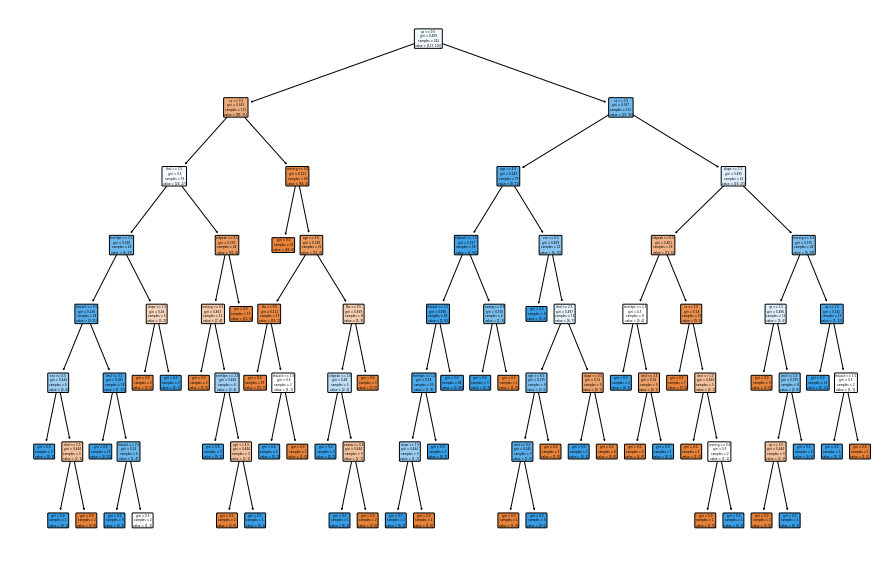

In [13]:
plt.figure(figsize=(15,10))
tree.plot_tree(Decision_Tree, filled=True, rounded=True,
               feature_names=X_train.columns.tolist(), proportion=False)
plt.show()

In [169]:
start_time = time.time()

Random_Forest =  RandomForestClassifier(n_estimators = 50, max_features=2)

Random_Forest.fit(X_train, y_train)

predictions = Random_Forest.predict(X_test)

print(f"f1_score: {f1_score(y_test, predictions): .3f}")
print(confusion_matrix(y_test, predictions))

compare_models = compare_models.append({'Model': 'Random_Forest', 
                               'f1_score': round(f1_score(y_test, predictions), 4 ),
                               'time': round(time.time() - start_time, 5)},  ignore_index=True)

f1_score:  0.857
[[13  8]
 [ 4 36]]


In [27]:
feature_importances = Random_Forest.feature_importances_

In [35]:
feature_importances

array([0.08672749, 0.04121651, 0.15470131, 0.06573384, 0.06442654,
       0.01939218, 0.05073755, 0.07495768, 0.07112037, 0.07425524,
       0.04918218, 0.15598581, 0.09156331])

In [21]:
number_of_trees = [20, 50, 100, 200, 400]
f1_score_trees = {}

for i in number_of_trees:
    Random_Forest =  RandomForestClassifier(n_estimators = i, max_features=2)
    Random_Forest.fit(X_train, y_train)
    predictions = Random_Forest.predict(X_test)
    f1_score_trees[i] = f1_score(y_test, predictions)

In [22]:
f1_score_trees

{20: 0.8470588235294118,
 50: 0.8641975308641976,
 100: 0.8571428571428572,
 200: 0.8604651162790697,
 400: 0.8705882352941177}

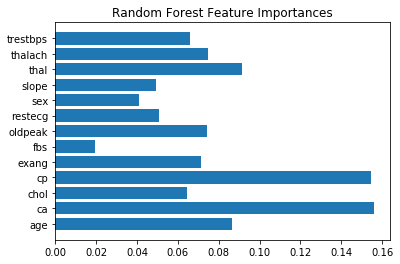

In [112]:
indices = np.argsort(feature_importances)[::-1] 

plt.barh(X_train.columns[indices], feature_importances[indices])
plt.title('Random Forest Feature Importances')
plt.show()

In [42]:
a = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i])[-5:]

In [54]:
X_train.columns[a]

Index(['thalach', 'age', 'thal', 'cp', 'ca'], dtype='object')

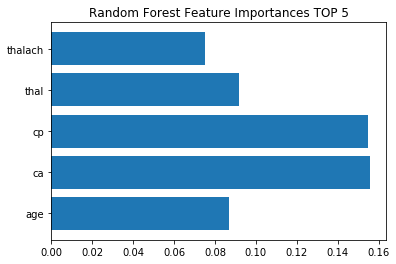

In [113]:
plt.barh( X_train.columns[sorted(range(len(feature_importances)), key=lambda i: feature_importances[i])[-5:]], 
                feature_importances[sorted(range(len(feature_importances)), key=lambda i: feature_importances[i])[-5:]])
         
plt.title('Random Forest Feature Importances TOP 5')
plt.show()

In [58]:
X_train.columns[a], feature_importances[a]

(Index(['thalach', 'age', 'thal', 'cp', 'ca'], dtype='object'),
 array([0.07495768, 0.08672749, 0.09156331, 0.15470131, 0.15598581]))

In [69]:
predictions = Decision_Tree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.7559523809523809

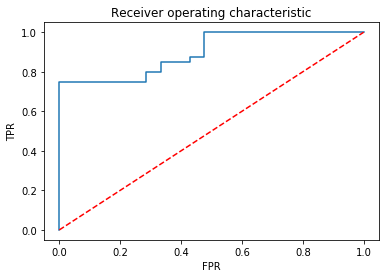

In [70]:
plt.figure()
plt.step(fpr, tpr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic')
plt.show()

In [72]:
predictions = Random_Forest.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.8749999999999999

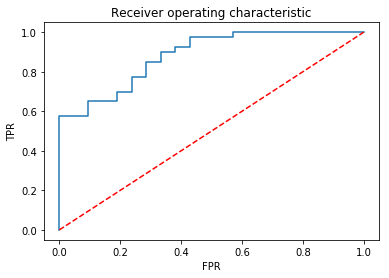

In [73]:
plt.figure()
plt.step(fpr, tpr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic')
plt.show()

In [171]:
start_time = time.time()

classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(f"f1_score: {f1_score(y_test, predictions): .3f}")
print(confusion_matrix(y_test, predictions))

compare_models = compare_models.append({'Model': 'AdaBoost', 
                               'f1_score': round(f1_score(y_test, predictions), 4 ),
                               'time': round(time.time() - start_time, 5)},  ignore_index=True)

f1_score:  0.857
[[13  8]
 [ 4 36]]


In [92]:
AdaBoost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)

AdaBoost.fit(X_train[['thal', 'sex', 'cp', 'chol']], y_train)

predictions = AdaBoost.predict(X_test[['thal', 'sex', 'cp', 'chol']])

print(f"f1_score: {f1_score(y_test, predictions): .3f}")
print(confusion_matrix(y_test, predictions))

f1_score:  0.846
[[16  5]
 [ 7 33]]


In [97]:
print(cross_val_score(AdaBoost, X, y, cv=7).mean())

0.8116883116883117


In [99]:
print(cross_val_score(classifier, X, y, cv=5).mean())

0.811639344262295


In [178]:
start_time = time.time()

Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)

predictions = Logistic_Regression.predict(X_test)

print(f"f1_score: {f1_score(y_test, predictions): .3f}")
print(confusion_matrix(y_test, predictions))

compare_models = compare_models.append({'Model': 'Logistic_Regression', 
                               'f1_score': round(f1_score(y_test, predictions), 4 ),
                               'time': round(time.time() - start_time, 5)},  ignore_index=True)

f1_score:  0.874
[[12  9]
 [ 2 38]]


In [179]:
start_time = time.time()

XGBoost = xgb.XGBClassifier(
        objective='binary:logistic',
        learning_rate =0.01,
         max_depth=3,
        scale_pos_weight = 1,
        n_estimators=40
    )

XGBoost.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=False
    )

predictions = XGBoost.predict(X_test)

print(f"f1_score: {f1_score(y_test, predictions): .3f}")
print(confusion_matrix(y_test, predictions))

compare_models = compare_models.append({'Model': 'XGBoost', 
                               'f1_score': round(f1_score(y_test, predictions), 4 ),
                               'time': round(time.time() - start_time, 5)},  ignore_index=True)

f1_score:  0.860
[[12  9]
 [ 3 37]]


C:\Users\home\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [180]:
compare_models

,Model,f1_score,time
0,Decision_Tree,0.8049,0.01496
1,Random_Forest,0.8571,0.11668
2,AdaBoost,0.8571,0.2244
3,Logistic_Regression,0.8736,0.03291
4,XGBoost,0.8605,0.07579


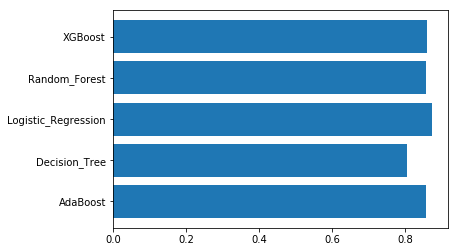

In [185]:
plt.barh(compare_models['Model'] ,compare_models['f1_score'] )
plt.show()

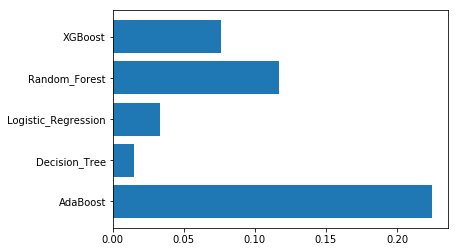

In [187]:
plt.barh(compare_models['Model'] ,compare_models['time'] )
plt.show()